In [8]:
import cv2
import numpy as np
import glob

# Define the dimensions of the checkerboard
CHECKERBOARD = (8, 5)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Create vectors to store 3D points and 2D points for all images
objpoints = []
imgpoints = []

# Define the real world coordinates for points in the checkerboard
objp = np.zeros((CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

# Get the file paths for all images in the local directory
images = glob.glob('*.png')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the checkerboard corners
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, None)

    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

# Perform camera calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Print the camera calibration results
print("Camera matrix : \n", mtx)
print("Distortion coefficients : \n", dist)
print("Rotation Vectors : \n", rvecs)
print("Translation Vectors : \n", tvecs)

2024-11-19 16:40:52.747 python[81397:2066204] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-19 16:40:52.747 python[81397:2066204] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


Camera matrix : 
 [[579.32404805   0.         637.64073906]
 [  0.         579.9715516  395.31447437]
 [  0.           0.           1.        ]]
Distortion coefficients : 
 [[-0.32910218  0.12393101  0.00229969 -0.00052199 -0.01858178]]
Rotation Vectors : 
 (array([[-0.21071171],
       [-0.10383708],
       [-0.00642141]]), array([[-0.04317407],
       [-0.15444275],
       [ 0.02248223]]), array([[-0.04250486],
       [-0.09745736],
       [-0.01426958]]), array([[ 0.09976452],
       [-0.09214038],
       [-0.05077117]]), array([[-0.616408  ],
       [-0.1624449 ],
       [ 0.69306087]]), array([[-0.595923  ],
       [-0.10680212],
       [ 0.71839843]]), array([[-0.47473288],
       [ 0.07355293],
       [-0.22567912]]), array([[-0.46774905],
       [ 0.07720969],
       [-0.19934424]]), array([[-0.54893176],
       [ 0.26430041],
       [ 0.02226017]]), array([[-0.10652805],
       [-0.09809592],
       [-0.00046316]]), array([[-0.07408843],
       [-0.10430817],
       [-0.016494

(800, 1280, 3)
(800, 1280, 3)


Text(0.5, 1.0, 'Undistorted Image')

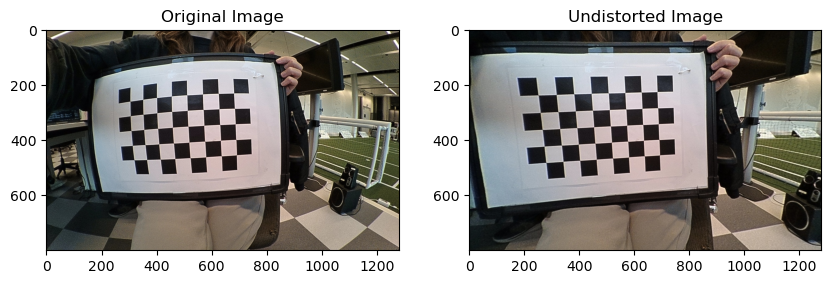

In [9]:
import matplotlib.pyplot as plt
# Read the first image
first_image = cv2.imread(images[4])
print(first_image.shape)
# Undistort the image
undistorted_image = cv2.undistort(first_image, mtx, dist, None, mtx)
print(undistorted_image.shape)
# Display the original and undistorted images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Undistorted Image')

(800, 1280, 3)


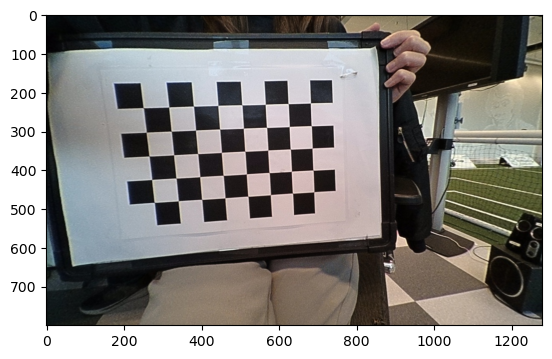

In [ ]:
img = cv2.imread(images[4])
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 0.1, (w,h))
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
 
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]

plt.imshow(dst[...,::-1])
print(dst.shape)

In [20]:
np.savetxt("mtx", mtx)
np.savetxt("dist", dist)